Goal
To determine if the high school graduation rate in Kentucky is affected by the salary of the classroom teachers. 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

1. Loading Data
    Read in two CSV files 

In [21]:
#load data
data_grad = pd.read_csv("data/grad rates.csv")
data_teacher = pd.read_csv("data/avgclsrmsal.csv", header=3)

2. Clean and operate on the data while combining them

In [22]:
#Removing data with no information for grad rates
data_grad.drop("1989-90", inplace=True, axis=1)
data_grad.drop("1990-91", inplace=True, axis=1)
data_grad.drop("1991-92", inplace=True, axis=1)
data_grad.drop("1992-93", inplace=True, axis=1)
data_grad.drop("1993-94", inplace=True, axis=1)
data_grad.drop("1994-95", inplace=True, axis=1)
data_grad.drop("1995-96", inplace=True, axis=1)
data_grad.drop("1996-97", inplace=True, axis=1)
data_grad.drop("1997-98", inplace=True, axis=1)
data_grad.drop("1998-99", inplace=True, axis=1)
data_grad.drop("1999-00", inplace=True, axis=1)
data_grad.drop("2000-01", inplace=True, axis=1)
data_grad.drop("2001-02", inplace=True, axis=1)
data_grad.drop("2009-10", inplace=True, axis=1)
data_grad.drop("2010-11", inplace=True, axis=1)
data_grad.drop("2011-12", inplace=True, axis=1)
data_grad.drop("2012-13", inplace=True, axis=1)
data_grad.drop("2013-14", inplace=True, axis=1)
data_grad.drop("2014-15", inplace=True, axis=1)
data_grad.drop("2015-16", inplace=True, axis=1)
data_grad.drop("2016-17", inplace=True, axis=1)
data_grad.drop("2017-18", inplace=True, axis=1)
data_grad.drop("2018-19", inplace=True, axis=1)
data_grad.drop("2019-20", inplace=True, axis=1)
data_grad.drop("2020-21", inplace=True, axis=1)
data_grad.drop("2021-22", inplace=True, axis=1)
data_grad.drop("2022-23", inplace=True, axis=1)
data_grad.drop("2023-24", inplace=True, axis=1)
data_grad.drop("2024-25", inplace=True, axis=1)
data_teacher.drop("1989-90", inplace=True, axis=1)
data_teacher.drop("1990-91", inplace=True, axis=1)
data_teacher.drop("1991-92", inplace=True, axis=1)
data_teacher.drop("1992-93", inplace=True, axis=1)
data_teacher.drop("1993-94", inplace=True, axis=1)
data_teacher.drop("1994-95", inplace=True, axis=1)
data_teacher.drop("1995-96", inplace=True, axis=1)
data_teacher.drop("1996-97", inplace=True, axis=1)
data_teacher.drop("1997-98", inplace=True, axis=1)
data_teacher.drop("1998-99", inplace=True, axis=1)
data_teacher.drop("1999-00", inplace=True, axis=1)
data_teacher.drop("2000-01", inplace=True, axis=1)
data_teacher.drop("2001-02", inplace=True, axis=1)
data_teacher.drop("2009-10", inplace=True, axis=1)
data_teacher.drop("2010-11", inplace=True, axis=1)
data_teacher.drop("2011-12", inplace=True, axis=1)
data_teacher.drop("2012-13", inplace=True, axis=1)
data_teacher.drop("2013-14", inplace=True, axis=1)
data_teacher.drop("2014-15", inplace=True, axis=1)
data_teacher.drop("2015-16", inplace=True, axis=1)
data_teacher.drop("2016-17", inplace=True, axis=1)
data_teacher.drop("2017-18", inplace=True, axis=1)
data_teacher.drop("2018-19", inplace=True, axis=1)
data_teacher.drop("2019-20", inplace=True, axis=1)
data_teacher.drop("2020-21", inplace=True, axis=1)
data_teacher.drop("2021-22", inplace=True, axis=1)
data_teacher.drop("2022-23", inplace=True, axis=1)
data_teacher.drop("2023-24", inplace=True, axis=1)
data_teacher.drop("2024-25", inplace=True, axis=1)

In [23]:
#Merge two data frames
merged_df = pd.merge(data_grad, data_teacher, left_on="District name", right_on="District name")
merged_df.head(5)

,District name,2002-03 _x,2003-04 _x,2004-05_x,2005-06_x,2006-07_x,2007-08_x,2008-09_x,Dist No,2002-03 _y,2003-04 _y,2004-05_y,2005-06_y,2006-07_y,2007-08_y,2008-09_y
0,ADAIR,66.0,74.0,85.0,72.0,83.0,82.0,86.0,001,"$37,104","$37,919","$38,923","$40,576","$41,810","$45,964","$47,482"
1,ALLEN,74.0,83.0,83.0,89.0,88.0,83.0,83.0,005,"$38,331","$39,540","$40,941","$41,869","$42,610","$46,148","$46,602"
2,ANCHORAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,006,"$47,635","$50,196","$52,606","$54,529","$56,295","$59,022","$59,157"
3,ANDERSON,88.0,86.0,86.0,86.0,90.0,90.0,89.0,011,"$36,464","$37,294","$38,559","$39,489","$41,732","$45,002","$46,263"
4,ASHLAND,86.0,87.0,85.0,84.0,83.0,84.0,88.0,012,"$39,913","$41,535","$43,106","$44,472","$45,984","$49,977","$49,723"


In [24]:
#Drop rows that have no graduation rates, due to no high school program in the district 
merged_df.dropna(inplace = True)



In [25]:
#Remove dollar signs and commas and covert to numeric values
merged_df[' 2002-03 _y'] = merged_df[' 2002-03 _y'].str.replace('[$,]', '', regex=True)
merged_df[' 2002-03 _y'] = pd.to_numeric(merged_df[' 2002-03 _y'])
merged_df[' 2003-04 _y'] = merged_df[' 2003-04 _y'].str.replace('[$,]', '', regex=True)
merged_df[' 2003-04 _y'] = pd.to_numeric(merged_df[' 2003-04 _y'])
merged_df['2004-05_y'] = merged_df['2004-05_y'].str.replace('[$,]', '', regex=True)
merged_df['2004-05_y'] = pd.to_numeric(merged_df['2004-05_y'])
merged_df['2005-06_y'] = merged_df['2005-06_y'].str.replace('[$,]', '', regex=True)
merged_df['2005-06_y'] = pd.to_numeric(merged_df['2005-06_y'])
merged_df['2006-07_y'] = merged_df['2006-07_y'].str.replace('[$,]', '', regex=True)
merged_df['2006-07_y'] = pd.to_numeric(merged_df['2006-07_y'])
merged_df['2007-08_y'] = merged_df['2007-08_y'].str.replace('[$,]', '', regex=True)
merged_df['2007-08_y'] = pd.to_numeric(merged_df['2007-08_y'])
merged_df['2008-09_y'] = merged_df['2008-09_y'].str.replace('[$,]', '', regex=True)
merged_df['2008-09_y'] = pd.to_numeric(merged_df['2008-09_y'])

In [26]:
#check data types
merged_df.dtypes


District name     object
 2002-03 _x      float64
 2003-04 _x      float64
2004-05_x        float64
2005-06_x        float64
2006-07_x        float64
2007-08_x        float64
2008-09_x        float64
Dist No           object
 2002-03 _y        int64
 2003-04 _y        int64
2004-05_y          int64
2005-06_y          int64
2006-07_y          int64
2007-08_y          int64
2008-09_y          int64
dtype: object

In [27]:
summary_stats = merged_df.describe()
summary_stats

,2002-03 _x,2003-04 _x,2004-05_x,2005-06_x,2006-07_x,2007-08_x,2008-09_x,2002-03 _y,2003-04 _y,2004-05_y,2005-06_y,2006-07_y,2007-08_y,2008-09_y
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,81.857988,83.798817,85.556213,86.289941,87.236686,87.928994,88.065089,37975.088757,39253.059172,40460.437870,41700.254438,42702.928994,46380.195266,46964.153846
std,8.604606,7.684694,6.758467,6.900135,6.809715,6.395287,6.081923,2134.875724,2269.417737,2372.849502,2442.941521,2554.933068,2578.276379,2578.088795
min,50.000000,62.000000,66.000000,61.000000,67.000000,70.000000,71.000000,30494.000000,30235.000000,31681.000000,33508.000000,32853.000000,37555.000000,38394.000000
25%,77.000000,79.000000,81.000000,82.000000,83.000000,84.000000,85.000000,36690.000000,37924.000000,39100.000000,40373.000000,41249.000000,44716.000000,45271.000000
50%,83.000000,84.000000,86.000000,87.000000,87.000000,88.000000,88.000000,37891.000000,39243.000000,40312.000000,41392.000000,42614.000000,46286.000000,46881.000000
75%,87.000000,89.000000,91.000000,90.000000,92.000000,91.000000,92.000000,39288.000000,40573.000000,41868.000000,43313.000000,44211.000000,48048.000000,48536.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,45701.000000,46776.000000,48099.000000,49645.000000,51287.000000,55255.000000,55692.000000


In [28]:
#removed districts with no high school programs
merged_df.dropna(inplace = True)

merged_df.head(5)

,District name,2002-03 _x,2003-04 _x,2004-05_x,2005-06_x,2006-07_x,2007-08_x,2008-09_x,Dist No,2002-03 _y,2003-04 _y,2004-05_y,2005-06_y,2006-07_y,2007-08_y,2008-09_y
0,ADAIR,66.0,74.0,85.0,72.0,83.0,82.0,86.0,001,37104,37919,38923,40576,41810,45964,47482
1,ALLEN,74.0,83.0,83.0,89.0,88.0,83.0,83.0,005,38331,39540,40941,41869,42610,46148,46602
3,ANDERSON,88.0,86.0,86.0,86.0,90.0,90.0,89.0,011,36464,37294,38559,39489,41732,45002,46263
4,ASHLAND,86.0,87.0,85.0,84.0,83.0,84.0,88.0,012,39913,41535,43106,44472,45984,49977,49723
5,AUGUSTA,100.0,100.0,100.0,100.0,100.0,96.0,100.0,013,31274,30235,31681,33508,32853,37555,38394


In [29]:
#Ensure all null values are removed
merged_df.isnull().sum()

District name    0
 2002-03 _x      0
 2003-04 _x      0
2004-05_x        0
2005-06_x        0
2006-07_x        0
2007-08_x        0
2008-09_x        0
Dist No          0
 2002-03 _y      0
 2003-04 _y      0
2004-05_y        0
2005-06_y        0
2006-07_y        0
2007-08_y        0
2008-09_y        0
dtype: int64

In [30]:

#create a ratio between graduation rate and teacher salary 
merged_df['ratio_2002-03'] = merged_df[' 2002-03 _y'] / merged_df[' 2002-03 _x']
merged_df['ratio_2003-04'] = merged_df[' 2003-04 _y'] / merged_df[' 2003-04 _x']
merged_df['ratio_2004-05'] = merged_df['2004-05_y'] / merged_df['2004-05_x']
merged_df['ratio_2005-06'] = merged_df['2005-06_y'] / merged_df['2005-06_x']
merged_df['ratio_2006-07'] = merged_df['2006-07_y'] / merged_df['2006-07_x']
merged_df['ratio_2007-08'] = merged_df['2007-08_y'] / merged_df['2007-08_x']
merged_df['ratio_2008-09'] = merged_df['2008-09_y'] / merged_df['2008-09_x']
merged_df.head()

,District name,2002-03 _x,2003-04 _x,2004-05_x,2005-06_x,2006-07_x,2007-08_x,2008-09_x,Dist No,2002-03 _y,...,2006-07_y,2007-08_y,2008-09_y,ratio_2002-03,ratio_2003-04,ratio_2004-05,ratio_2005-06,ratio_2006-07,ratio_2007-08,ratio_2008-09
0,ADAIR,66.0,74.0,85.0,72.0,83.0,82.0,86.0,001,37104,...,41810,45964,47482,562.181818,512.418919,457.917647,563.555556,503.734940,560.536585,552.116279
1,ALLEN,74.0,83.0,83.0,89.0,88.0,83.0,83.0,005,38331,...,42610,46148,46602,517.986486,476.385542,493.265060,470.438202,484.204545,556.000000,561.469880
3,ANDERSON,88.0,86.0,86.0,86.0,90.0,90.0,89.0,011,36464,...,41732,45002,46263,414.363636,433.651163,448.360465,459.174419,463.688889,500.022222,519.808989
4,ASHLAND,86.0,87.0,85.0,84.0,83.0,84.0,88.0,012,39913,...,45984,49977,49723,464.104651,477.413793,507.129412,529.428571,554.024096,594.964286,565.034091
5,AUGUSTA,100.0,100.0,100.0,100.0,100.0,96.0,100.0,013,31274,...,32853,37555,38394,312.740000,302.350000,316.810000,335.080000,328.530000,391.197917,383.940000


In [31]:
#Calculate the means for the numeric columns
means_df = merged_df.select_dtypes(include=np.number).mean().to_frame().transpose()

# Rename the index to something descriptive 
means_df.index = ['Column Means']
means_df.head()



,2002-03 _x,2003-04 _x,2004-05_x,2005-06_x,2006-07_x,2007-08_x,2008-09_x,2002-03 _y,2003-04 _y,2004-05_y,...,2006-07_y,2007-08_y,2008-09_y,ratio_2002-03,ratio_2003-04,ratio_2004-05,ratio_2005-06,ratio_2006-07,ratio_2007-08,ratio_2008-09
Column Means,81.857988,83.798817,85.556213,86.289941,87.236686,87.928994,88.065089,37975.088757,39253.059172,40460.43787,...,42702.928994,46380.195266,46964.153846,469.834615,472.549617,475.918519,486.610491,492.69288,530.266089,536.059138


3. Visualize

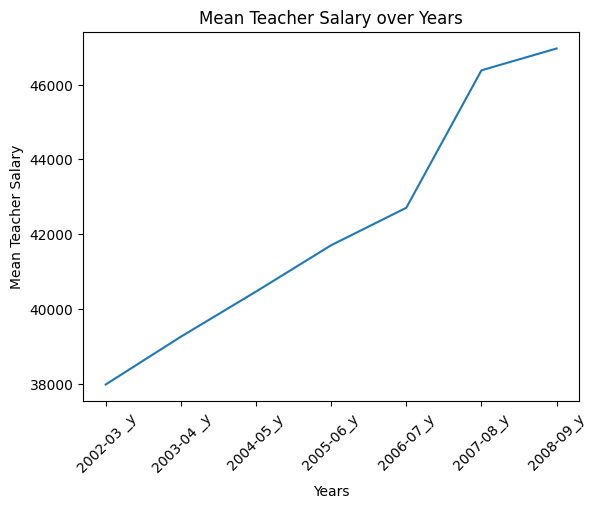

In [40]:
#Chart for the Mean Teacher Salary over the given years

years = [' 2002-03 _y', ' 2003-04 _y', '2004-05_y', '2005-06_y', '2006-07_y', '2007-08_y', '2008-09_y']
mean_salaries = []
for year in years:
    mean_salaries.append(merged_df[year].mean())


plt.plot(years, mean_salaries)
plt.xlabel('Years')
plt.ylabel('Mean Teacher Salary')
plt.title('Mean Teacher Salary over Years')
plt.xticks(rotation=45)
plt.show()


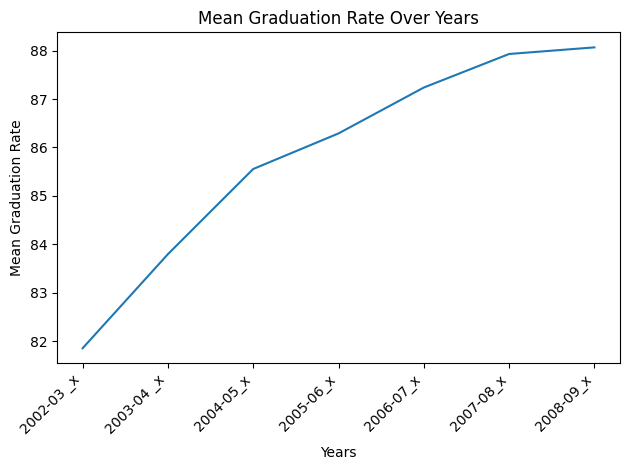

In [ ]:
#Chart for the Mean Graduation Rate over the given years
years = [col for col in merged_df.columns if '_x' in col]
mean_grad_rates = [merged_df[year].mean() for year in years]

plt.plot(years, mean_grad_rates)
plt.xlabel('Years')
plt.ylabel('Mean Graduation Rate')
plt.title('Mean Graduation Rate Over Years')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


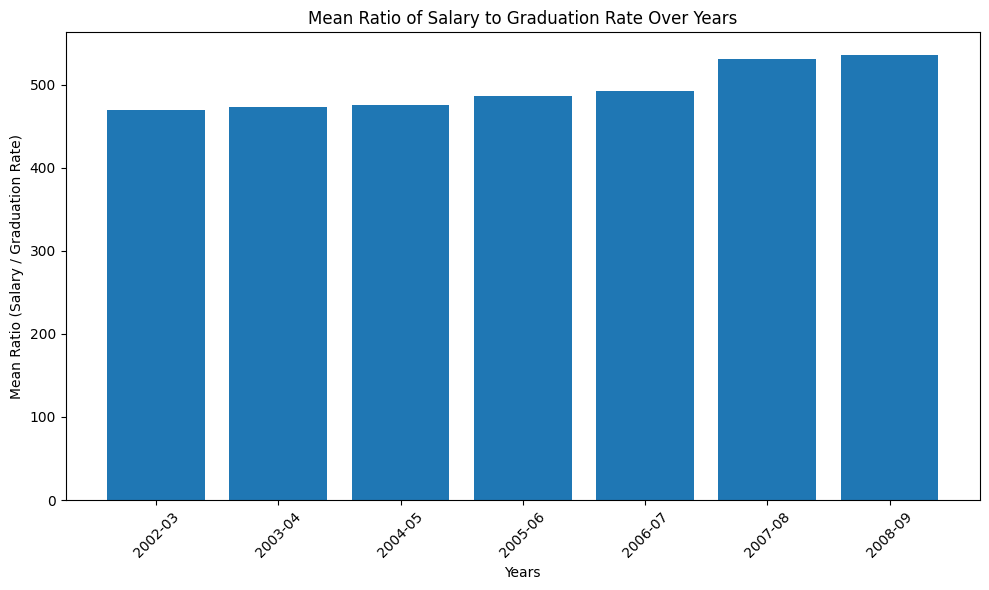

In [ ]:
#Chart for the Mean Ratio (Salary/Gradutaion) over the given years

ratios = ['ratio_2002-03', 'ratio_2003-04', 'ratio_2004-05', 'ratio_2005-06', 'ratio_2006-07', 'ratio_2007-08', 'ratio_2008-09']
mean_ratios = [merged_df[ratio].mean() for ratio in ratios]
years = ['2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09']

plt.figure(figsize=(10, 6))  
plt.bar(years, mean_ratios)
plt.xlabel('Years')
plt.ylabel('Mean Ratio (Salary / Graduation Rate)')
plt.title('Mean Ratio of Salary to Graduation Rate Over Years')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


Conculsion 
Over the given period the graduation rate and teacher salaries both increased. The increase in teacher salary does appear to have a positive impact on overall graduation rate.  

In [ ]:
# Created Data Dictionary  
merged_df.to_csv('merged_data.csv', index=False)